In [9]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# load dataset
df = pd.read_csv('headlines.csv', header=None)
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [23]:
df.shape

(2225, 1)

In [24]:
print(df.iloc[1, :].values[0])

Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Bord

In [38]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [39]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [40]:
def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    if tag[0][1].startswith('N'):
        pos = 'n'
    elif tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('R'):
        pos = 'r'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    return wnl.lemmatize(word, pos= pos)

In [41]:
lemmatize('the')

'the'

In [57]:
def clean_text(text):
    tokens1 = word_tokenize(text)
    tokens2 = [token for token in tokens1 if token.isalnum()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

In [58]:
# Function for cleaning the data
def clean_text1(text):
    tokens1 = word_tokenize(text)
    tokens2 = [token for token in tokens1 if token.isalnum()]
    tokens3 = [token for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token).lower() for token in tokens3]
    return tokens4

In [44]:
sent = 'Hello friends! How are you? He likes Python Programming.'

In [59]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [60]:
clean_text1(sent)

['hello', 'friend', 'like', 'python', 'programming']

TF*IDF

In [61]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [62]:
tf = TfidfVectorizer(analyzer=clean_text)

In [63]:
%%time
x_new = tf.fit_transform(df[0])

CPU times: total: 4min 28s
Wall time: 4min 42s


In [64]:
x_new

<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

In [66]:
tf.get_feature_names_out()

array(['0', '000', '0001', ..., 'zutons', 'zvonareva', 'zvyagintsev'],
      dtype=object)

Create the cluster

In [68]:
from sklearn.cluster import KMeans

In [69]:
km = KMeans(random_state=0)

In [70]:
km.fit_predict(x_new)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([4, 6, 4, ..., 2, 5, 2])

In [72]:
len(km.labels_)

2225

In [71]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [74]:
km.inertia_

2067.496919411737

Elbow Method

In [80]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(x_new)
    sse.append(km.inertia_)

In [76]:
sse

[2158.1638456648802,
 2136.7371877395954,
 2120.65464857829,
 2110.2507559604214,
 2093.210248790616,
 2084.606644836629,
 2079.549640885244,
 2067.496919411737,
 2062.4271721320465,
 2055.0892624682315,
 2046.512805310553,
 2040.8698732414307,
 2034.6764514343834,
 2030.0046084142634,
 2025.6996559473744]

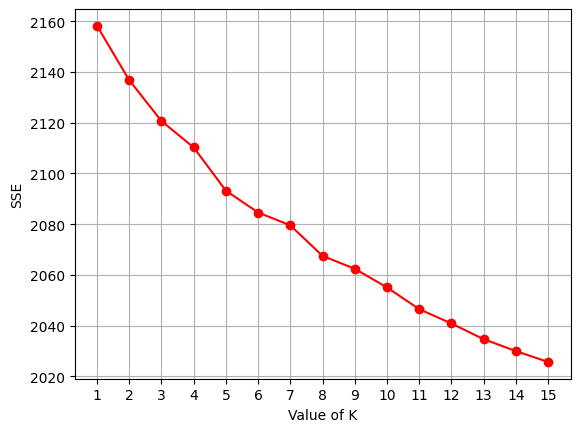

In [81]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1, 16), sse, marker = 'o', color='r')

Create the cluster

In [83]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [84]:
labels = km.fit_predict(x_new)

In [85]:
labels

array([4, 3, 4, ..., 3, 3, 3])

Separate the cluster

In [88]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

In [89]:
print('Cluster-0:',len(zero))
print('Cluster-1:',len(one))
print('Cluster-2:',len(two))
print('Cluster-3:',len(three))
print('Cluster-4:',len(four))

Cluster-0: 376
Cluster-1: 331
Cluster-2: 521
Cluster-3: 716
Cluster-4: 281


Remove Stopwords

In [99]:
swords = stopwords.words('english')

In [116]:
from nltk import FreqDist
def freq(data):
    new = ' '.join(data[0])
    clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
    freq = FreqDist(clean)
    print(freq.most_common(10))
    return clean


In [128]:
cfreq0 = freq(zero)
cfreq1 = freq(one)
cfreq2 = freq(two)
cfreq3 = freq(three)
cfreq4 = freq(four)

[('said', 1518), ('people', 885), ('also', 490), ('Mr', 475), ('technology', 468), ('new', 448), ('would', 444), ('could', 432), ('mobile', 423), ('music', 417)]
[('film', 669), ('said', 621), ('best', 575), ('also', 337), ('year', 319), ('music', 289), ('show', 261), ('one', 250), ('US', 246), ('first', 212)]
[('said', 963), ('game', 520), ('England', 465), ('first', 440), ('would', 422), ('win', 412), ('last', 370), ('one', 344), ('also', 343), ('two', 342)]
[('said', 2614), ('US', 932), ('Mr', 867), ('would', 775), ('year', 761), ('also', 603), ('government', 530), ('could', 463), ('company', 457), ('new', 451)]
[('said', 1528), ('Mr', 1485), ('would', 814), ('Labour', 727), ('election', 547), ('Blair', 540), ('government', 501), ('people', 431), ('party', 411), ('Brown', 375)]


Word Cloud

In [122]:
from wordcloud import WordCloud

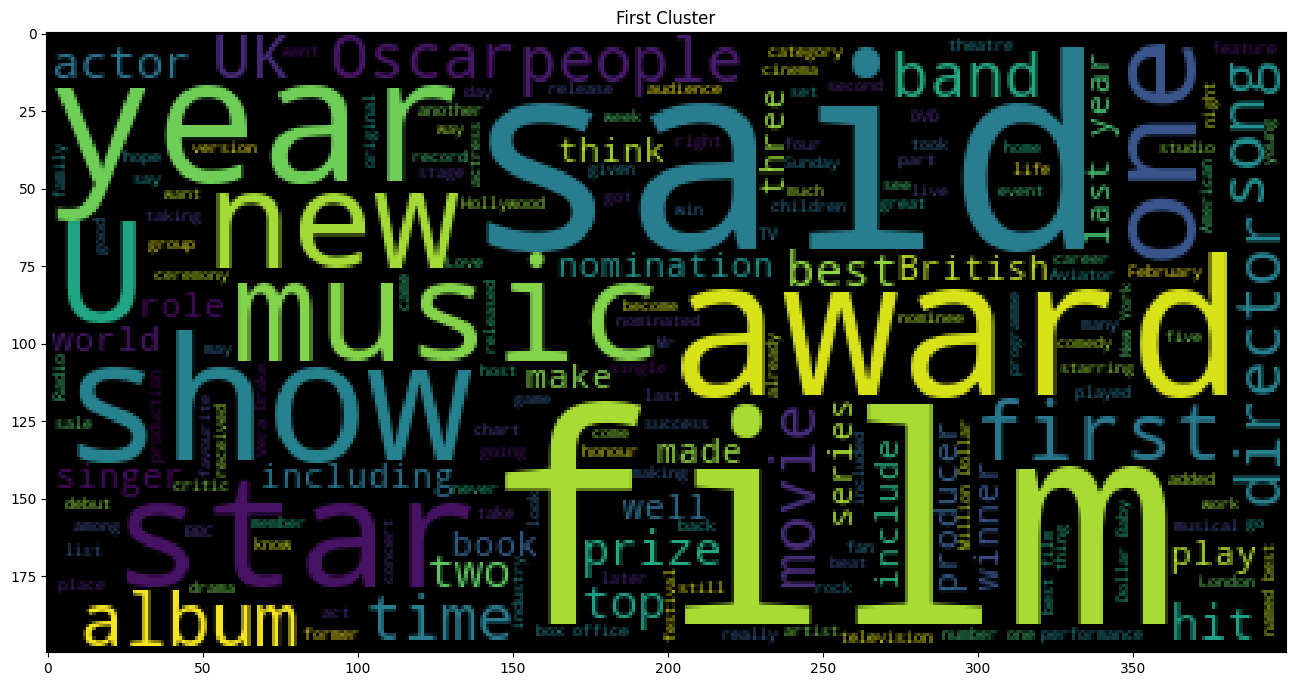

In [123]:
wc = WordCloud().generate(' '.join(cfreq1))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

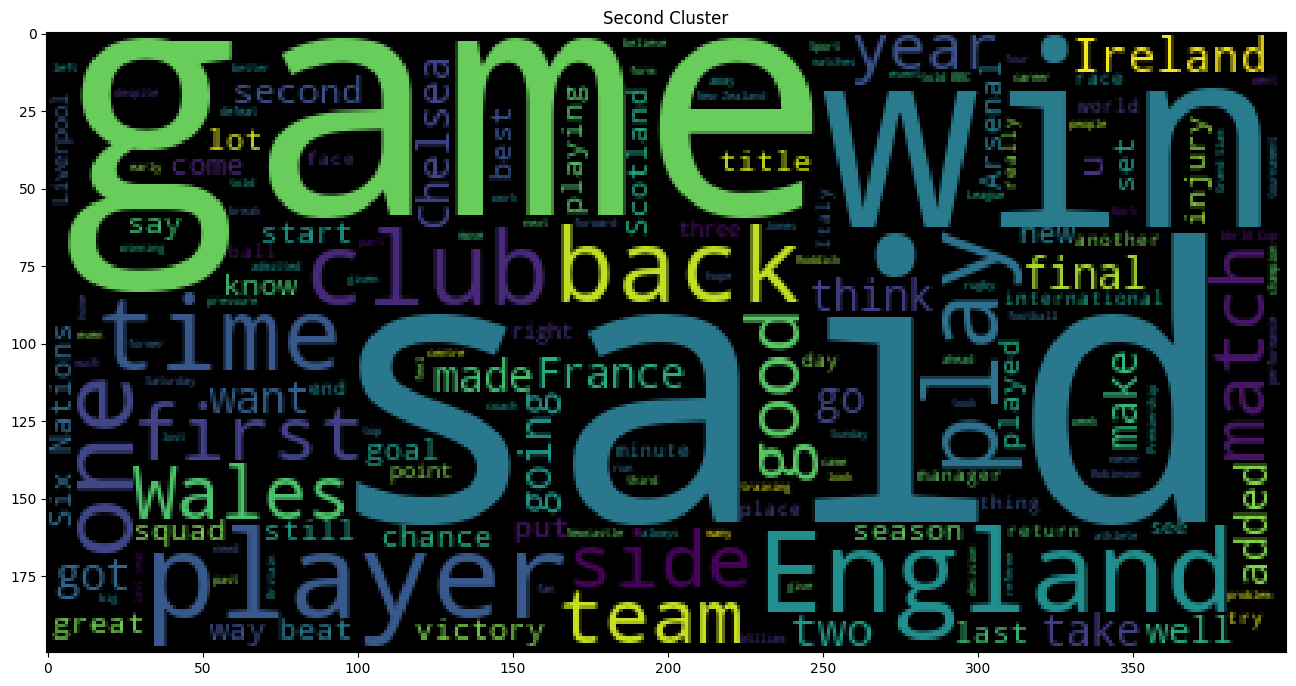

In [124]:
wc = WordCloud().generate(' '.join(cfreq2))
plt.figure(figsize=(16,9))
plt.title('Second Cluster')
plt.imshow(wc)

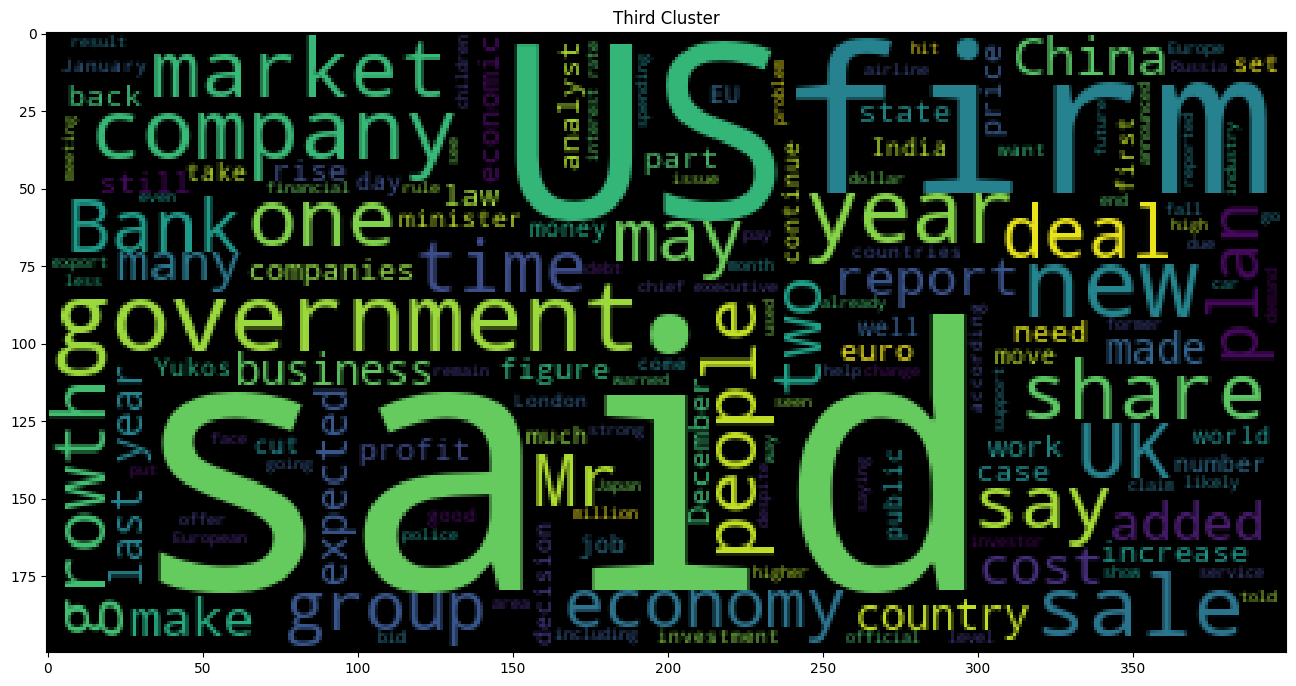

In [125]:
wc = WordCloud().generate(' '.join(cfreq3))
plt.figure(figsize=(16,9))
plt.title('Third Cluster')
plt.imshow(wc)

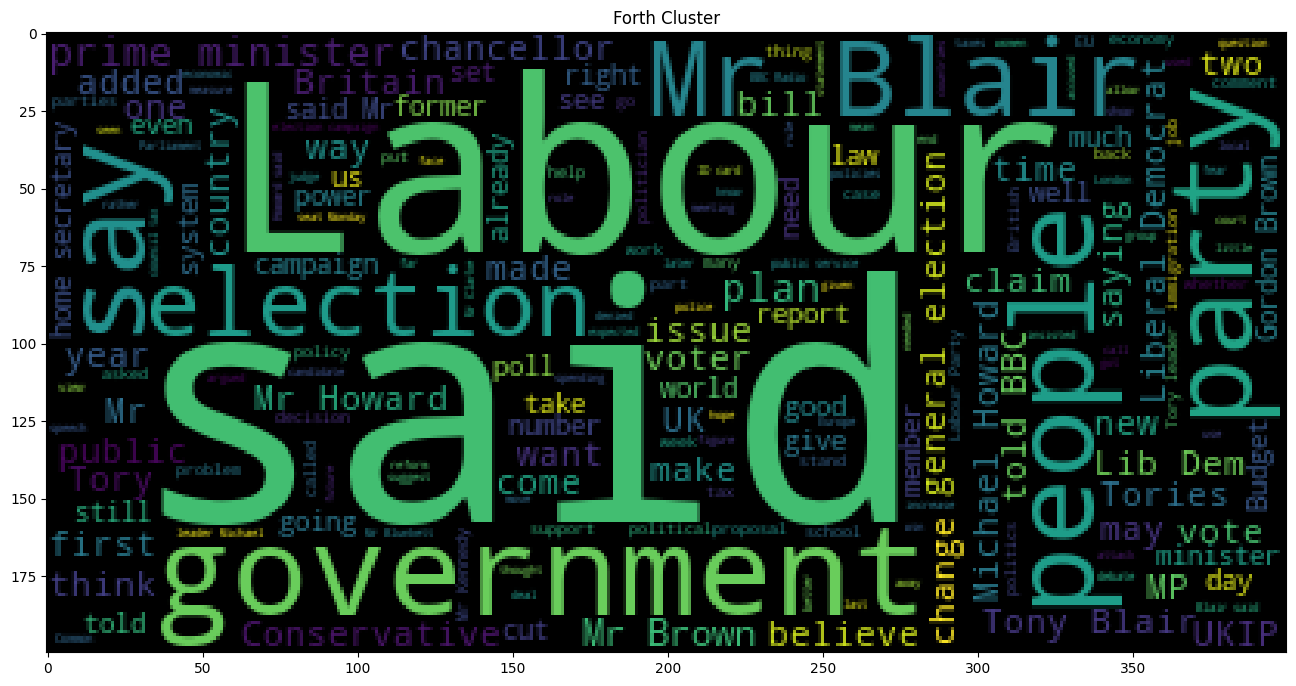

In [126]:
wc = WordCloud().generate(' '.join(cfreq4))
plt.figure(figsize=(16,9))
plt.title('Forth Cluster')
plt.imshow(wc)

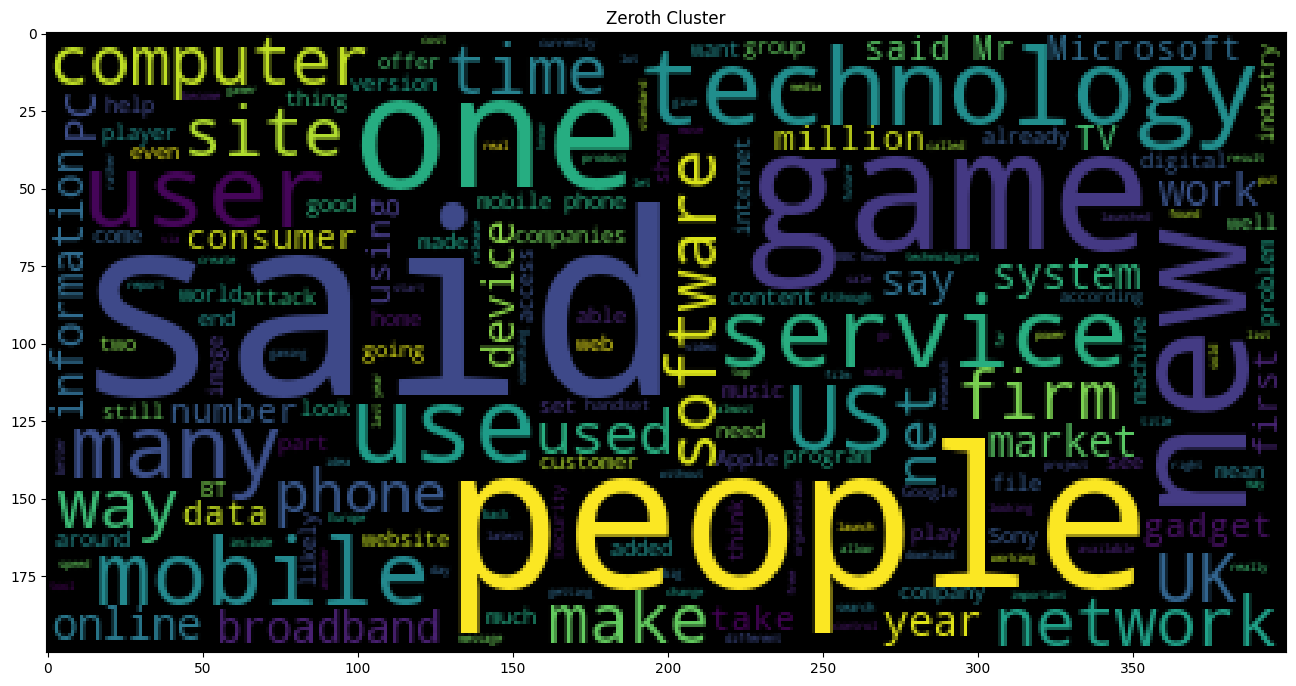

In [129]:
wc = WordCloud().generate(' '.join(cfreq0))
plt.figure(figsize=(16,9))
plt.title('Zeroth Cluster')
plt.imshow(wc)